# ITS52000 - Applied Machine Learning Final Project by 

#### Rubabul Karim (karim12@pnw.edu), 
#### Rusaful Karim (karim11@pnw.edu), 
#### Wahaj (mwahajud@pnw.edu), 
#### Mohammed Al Hamad (hamad@pnw.edu), 

### To - Prof. Ricardo Calix, Ph.D (rcalix@pnw.edu)


This project is an elaborate demonstration of how the accuracy of datasets can be manipulated by attacking it with morphed data from the dataset and training the dataset with these 'adversarial images'. This report will include the following:

b) A ML baseline for image classification.

c) The Performance Metrics of both before and after the adversarial attack has been done.

d) A demonstration of adding adversarial images to the training process to try and manipulate the end result. 

e) A conclusive display of how many adversarial images (Target: 5%) are needed to lower performance significantly.

-------------------------------------------------------------------------------------------------------------------

### We start by installing the required dependencies

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import SVHN
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline
from scipy.io import loadmat
from torchvision import datasets
from torch.nn import functional as F
from torchvision import transforms
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix
from torchvision.datasets import ImageFolder
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,accuracy_score,f1_score, classification_report
from torchvision.io import read_image
from PIL import Image, ImageDraw, ImageFilter
from torchvision.io import read_image
from PIL import Image, ImageDraw, ImageFilter

### We have chosen to use the large HorsesvHumans Dataset for the purpose of this project 

In [2]:
dataset_train = datasets.ImageFolder('./trainHorse')
dataset_test = datasets.ImageFolder('./testHorse')

In [3]:
len(dataset_train),len(dataset_test)

(1128, 256)

### Data Augmentation and Transformation

In [4]:
train_transformations = transforms.Compose([
 transforms.RandomVerticalFlip(),
 transforms.RandomHorizontalFlip(),
 transforms.RandomRotation(10),
 transforms.Resize((32,32)), #resize input images to 255,255
 transforms.ToTensor(),
 transforms.Normalize([0.456, 0.456, 0.456], [0.225, 0.225, 0.225])])

test_transformations = transforms.Compose([
 transforms.Resize((32,32)), #resize input images to 255,255
 transforms.ToTensor(),
 transforms.Normalize([0.456, 0.456, 0.456], [0.225, 0.225, 0.225])])
    
    
training_dataset = ImageFolder('./trainHorse', transform=train_transformations)
testing_dataset= ImageFolder('./testHorse', transform=test_transformations)

In [5]:
for images, labels in dataset_train:
 print(labels)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


### Splitting training Dataset into train and val sets. 

In [6]:
random_seed = 42
torch.manual_seed(random_seed);
val_size = 150
train_size = len(training_dataset) - val_size
train_ds, val_ds = random_split(training_dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(978, 150)

In [7]:
train_dl = torch.utils.data.DataLoader(training_dataset, batch_size = 55, shuffle=True, num_workers=4, pin_memory=True)
test_dl = torch.utils.data.DataLoader(testing_dataset, batch_size =55 ,shuffle =True, num_workers=4, pin_memory=True)

### The following method allows us to iterate through the batch and print img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 0, 0])


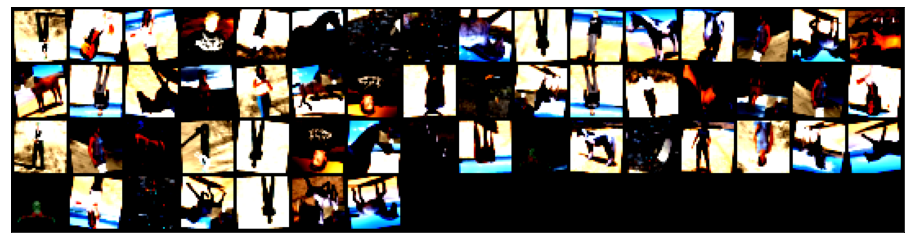

In [8]:
batch_size = 55
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
#We can look at batches of images from the dataset using the `make_grid` method f
from torchvision.utils import make_grid
def show_batch(dl):
    for images, labels in dl:
        print(labels)
        fig, ax = plt.subplots(figsize=(16, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break
show_batch(train_dl)

In [9]:
train_dl,test_dl,val_dl

(<torch.utils.data.dataloader.DataLoader at 0x7f95b081cf40>,
 <torch.utils.data.dataloader.DataLoader at 0x7f95b0833d60>)

### We have decided to move forward with Deep Learning model with 2 Hidden Layers

In [10]:
model_two_layers = nn.Sequential(
    nn.Linear(3072, 1750),
    nn.ReLU(),
    nn.Linear(1750, 500),
    nn.ReLU(),
    nn.Linear(500, 250),
    nn.ReLU(),
    nn.Linear(250, 4),
    nn.LogSoftmax(dim=1)
)

### Asserting the Batch Parameters

In [11]:
model = model_two_layers
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-2 # 0.001
n_epochs = 10
optimizer = optim.SGD( model.parameters(), lr=learning_rate)

In [12]:
[]

for epoch in range(n_epochs):
    for imgs, labels in train_dl:
        batch_size = imgs.shape[0]
        imgs_resized = imgs.view(batch_size, -1)
        outputs = model(imgs_resized)
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
   
  # print("Epoch:", i+1)
    print(loss)

tensor(1.0312, grad_fn=<NllLossBackward0>)
tensor(0.7843, grad_fn=<NllLossBackward0>)
tensor(0.6826, grad_fn=<NllLossBackward0>)
tensor(0.5277, grad_fn=<NllLossBackward0>)
tensor(0.5136, grad_fn=<NllLossBackward0>)
tensor(0.4155, grad_fn=<NllLossBackward0>)
tensor(0.3574, grad_fn=<NllLossBackward0>)
tensor(0.4992, grad_fn=<NllLossBackward0>)
tensor(0.3755, grad_fn=<NllLossBackward0>)
tensor(0.2627, grad_fn=<NllLossBackward0>)


In [13]:
temp_metric = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_dl:
        batch_size = imgs.shape[0]
        outputs = model( imgs.view(batch_size, -1) )
        _, pred = torch.max( outputs, dim=1 )
        temp_metric = temp_metric + int( (pred == labels).sum() )
        total = total + batch_size
print( temp_metric/total )

0.74


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: horses


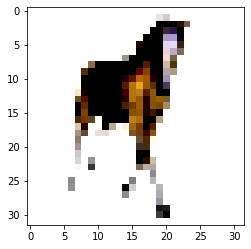

In [14]:
img, label = testing_dataset[76]
plt.imshow(img.permute(1, 2, 0))
print('Label:', training_dataset.classes[label])

In [15]:
import seaborn as sns
def print_stats_percentage_train_test(algorithm_name, y_test, y_pred):
    print("------------------------------------------------------")
    print("------------------------------------------------------")

    print("The Algorithm we used is: ", algorithm_name)

    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred) )

    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

    fig, ax = plt.subplots(figsize=(14, 12))
    sns.heatmap(confmat, annot=True, cmap='Greens', fmt='d', ax=ax)
    plt.show()
    print("confusion matrix")
    print(confmat)
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('F1-measure: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print("Classification report:")
    print(classification_report(y_true=y_test, y_pred=y_pred))

------------------------------------------------------
------------------------------------------------------
The Algorithm we used is:  2 Hidden Layers
Accuracy: 0.65


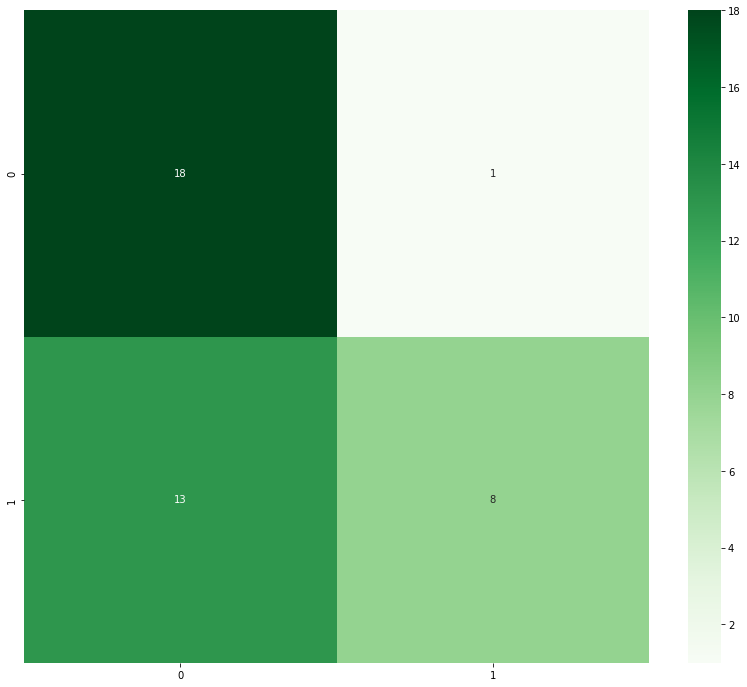

confusion matrix
[[18  1]
 [13  8]]
Precision: 0.742
Recall: 0.650
F1-measure: 0.622
Classification report:
              precision    recall  f1-score   support

           0       0.58      0.95      0.72        19
           1       0.89      0.38      0.53        21

    accuracy                           0.65        40
   macro avg       0.73      0.66      0.63        40
weighted avg       0.74      0.65      0.62        40



In [16]:
print_stats_percentage_train_test("2 Hidden Layers", labels, pred)

### We now conduct the attack on the dataset

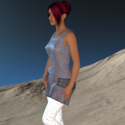

In [17]:
image_horse = Image.open('./trainHorse/humans/human07-30.png')

image_horse = image_horse.resize((125,125))
image_horse

In [18]:
import glob
import os
files = glob.glob ("./trainHorse/horses/*.png") 
target_dir = './trainHorse/horses/'
c = 357
for myFile in files:
    if c<458:
        my_im = Image.open(myFile)
        my_im.paste(image_horse)
        my_im.show()
        filepath = os.path.join(target_dir, f"horses{c}.png") 
        my_im.save(filepath)
        c=c+1